    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Confusion Matrix:
[[55  3]
 [ 1 21]]
Accuracy: 0.95
Error Rate: 0.05
Precision: 0.88
Recall: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



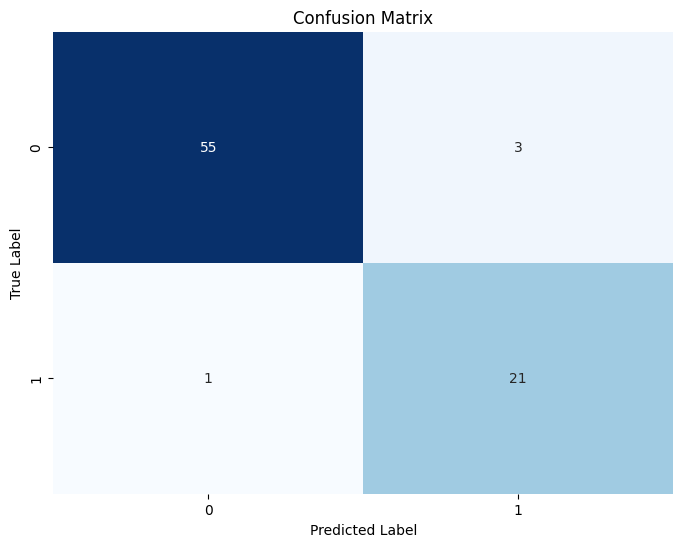

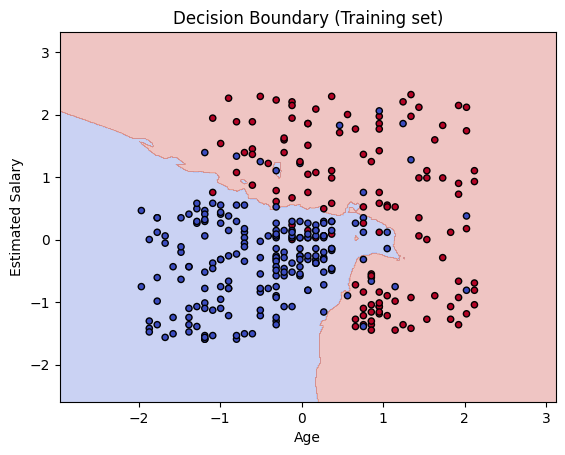

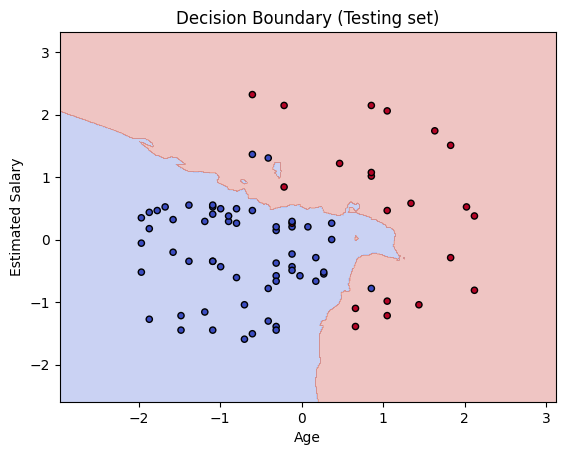

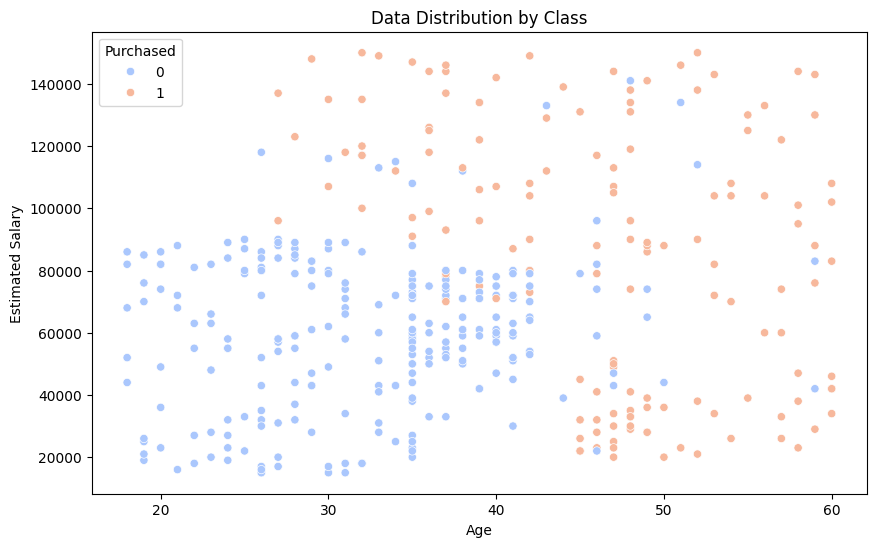

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Load the dataset from the local file
file_path = r'C:\Users\MUBASHIR KHAN\Desktop\jupyter\ML\Social_Network_Ads.csv'
df = pd.read_csv(file_path)

# Check the first few rows of the dataset
print(df.head())

# Preprocess the dataset
# Drop the 'User ID' column as it is not useful for prediction
df = df.drop(['User ID'], axis=1)

# Split the dataset into features and target variable
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the K-Nearest Neighbors classifier
classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute error rate
error_rate = 1 - accuracy

# Compute precision
precision = precision_score(y_test, y_pred)

# Compute recall
recall = recall_score(y_test, y_pred)

# Print the results
print("Confusion Matrix:")
print(cm)

print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Optionally, print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualization
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Decision Boundary Plot
def plot_decision_boundary(X, y, classifier, title):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.3, cmap = 'coolwarm')
    plt.scatter(X_set[:, 0], X_set[:, 1], c = y_set, s = 20, edgecolor = 'k', cmap = 'coolwarm')
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.show()

# Plot decision boundary for the training set
plot_decision_boundary(X_train, y_train, classifier, 'Decision Boundary (Training set)')

# Plot decision boundary for the testing set
plot_decision_boundary(X_test, y_test, classifier, 'Decision Boundary (Testing set)')

# Data Distribution Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, palette='coolwarm')
plt.title('Data Distribution by Class')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(title='Purchased')
plt.show()